<a href="https://colab.research.google.com/github/swarna32/heart_failure/blob/main/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/nnfll/heart.csv')

In [ ]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Sex', 'ST_Slope','ExerciseAngina']

label_encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

print(dataset.head())

   Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    1           ATA        140          289          0     Normal   
1   49    0           NAP        160          180          0     Normal   
2   37    1           ATA        130          283          0         ST   
3   48    0           ASY        138          214          0     Normal   
4   54    1           NAP        150          195          0     Normal   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [ ]:
# Apply one hot encoding on multiple columns
dataset_encoded = pd.get_dummies(dataset, columns=['ChestPainType', 'RestingECG'])

# Concatenate the encoded dataframe with the original dataframe
dataset = pd.concat([dataset, dataset_encoded], axis=1)

dataset.drop(['ChestPainType', 'RestingECG'], axis=1, inplace=True)

# Print the concatenated dataframe
dataset


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,...,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,2,0,...,0.0,2,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.0,1,1,...,1.0,1,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,2,0,...,0.0,2,0,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,...,1.5,1,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,2,0,...,0.0,2,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,1,...,1.2,1,1,0,0,0,1,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,...,3.4,1,1,1,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,...,1.2,1,1,1,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,1,...,0.0,1,1,0,1,0,0,1,0,0


In [ ]:
X = dataset.iloc[:, list(range(9)) + list(range(10, 27))]
y = dataset.iloc[:, 9].values

In [ ]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,...,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,2,40,...,0.0,2,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.0,1,49,...,1.0,1,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,2,37,...,0.0,2,0,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.5,1,48,...,1.5,1,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,2,54,...,0.0,2,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,45,...,1.2,1,1,0,0,0,1,0,1,0
914,68,1,144,193,1,141,0,3.4,1,68,...,3.4,1,1,1,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,57,...,1.2,1,1,1,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,57,...,0.0,1,1,0,1,0,0,1,0,0


In [ ]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[0.24489796, 1.        , 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.42857143, 0.        , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.18367347, 1.        , 0.65      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.65      , ..., 0.        , 1.        ,
        0.        ],
       [0.59183673, 0.        , 0.65      , ..., 1.        , 0.        ,
        0.        ],
       [0.20408163, 1.        , 0.69      , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
X.shape

(918, 26)

In [ ]:
X_test.shape

(184, 26)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=26, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                540       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 8)                 128       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 992
Trainable params: 992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=100, batch_size=40)

Epoch 1/100
19/19 [==============================] - 1s 2ms/step - loss: 0.6746 - accuracy: 0.4537
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.5777
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7766
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8365
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.9128
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.9591
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.9796
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9864
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9891
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9918
Epoch 11/

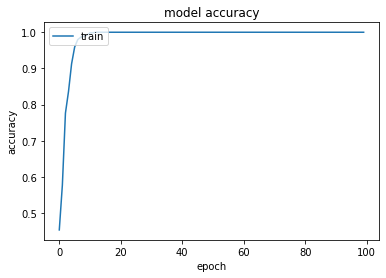

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

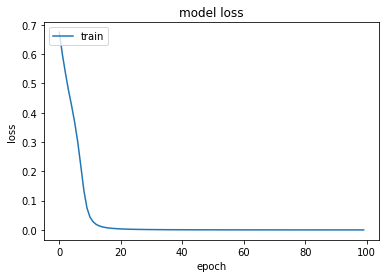

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot training loss
plt.plot(history.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 1.0016e-04 - accuracy: 1.0000


In [ ]:
history_test

[0.00010015701991505921, 1.0]

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, predictions)
ac = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))
print(cm)
print(ac)

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184

[[ 77   0]
 [  0 107]]
1.0


In [ ]:
print(cm)
print(ac)

[[ 76   1]
 [  4 103]]
0.9728260869565217


In [ ]:
dataset2 = pd.read_csv('/content/drive/MyDrive/nnfll/heart.csv')

In [ ]:
dataset2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Sex', 'ST_Slope','ExerciseAngina']

label_encoders = {}
for col in cols_to_encode:
    le = LabelEncoder()
    dataset2[col] = le.fit_transform(dataset2[col])
    label_encoders[col] = le

print(dataset2.head())

   Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    1           ATA        140          289          0     Normal   
1   49    0           NAP        160          180          0     Normal   
2   37    1           ATA        130          283          0         ST   
3   48    0           ASY        138          214          0     Normal   
4   54    1           NAP        150          195          0     Normal   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [ ]:
# Apply one hot encoding on multiple columns
dataset2_encoded = pd.get_dummies(dataset2, columns=['ChestPainType', 'RestingECG','HeartDisease'])

# Concatenate the encoded dataframe with the original dataframe
dataset2 = pd.concat([dataset2, dataset2_encoded], axis=1)

dataset2.drop(['ChestPainType', 'RestingECG','HeartDisease'], axis=1, inplace=True)

# Print the concatenated dataframe
dataset2

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Age,...,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease_0,HeartDisease_1
0,40,1,140,289,0,172,0,0.0,2,40,...,2,0,1,0,0,0,1,0,1,0
1,49,0,160,180,0,156,0,1.0,1,49,...,1,0,0,1,0,0,1,0,0,1
2,37,1,130,283,0,98,0,0.0,2,37,...,2,0,1,0,0,0,0,1,1,0
3,48,0,138,214,0,108,1,1.5,1,48,...,1,1,0,0,0,0,1,0,0,1
4,54,1,150,195,0,122,0,0.0,2,54,...,2,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,45,...,1,0,0,0,1,0,1,0,0,1
914,68,1,144,193,1,141,0,3.4,1,68,...,1,1,0,0,0,0,1,0,0,1
915,57,1,130,131,0,115,1,1.2,1,57,...,1,1,0,0,0,0,1,0,0,1
916,57,0,130,236,0,174,0,0.0,1,57,...,1,0,1,0,0,1,0,0,0,1


In [ ]:
X = dataset.iloc[:,0:25 ]
y = dataset.iloc[:,[25,26]].values

In [ ]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,...,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH
0,40,1,140,289,0,172,0,0.0,2,0,...,172,0,0.0,2,0,0,1,0,0,0
1,49,0,160,180,0,156,0,1.0,1,1,...,156,0,1.0,1,1,0,0,1,0,0
2,37,1,130,283,0,98,0,0.0,2,0,...,98,0,0.0,2,0,0,1,0,0,0
3,48,0,138,214,0,108,1,1.5,1,1,...,108,1,1.5,1,1,1,0,0,0,0
4,54,1,150,195,0,122,0,0.0,2,0,...,122,0,0.0,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,1,...,132,0,1.2,1,1,0,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,...,141,0,3.4,1,1,1,0,0,0,0
915,57,1,130,131,0,115,1,1.2,1,1,...,115,1,1.2,1,1,1,0,0,0,0
916,57,0,130,236,0,174,0,0.0,1,1,...,174,0,0.0,1,1,0,1,0,0,1


In [ ]:
y

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 0],
       [1, 0]], dtype=uint8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
X_train.shape

(734, 25)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model2 = Sequential()
model2.add(Dense(40, input_dim=25, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(10, activation='relu'))

model2.add(Dense(2, activation='softmax'))
# compile the keras model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 40)                1040      
                                                                 
 dense_20 (Dense)            (None, 20)                820       
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 2)                 22        
                                                                 
Total params: 2,092
Trainable params: 2,092
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train,y_train,epochs=100, batch_size=64)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7929
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.8079
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.8079
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.8079
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.8079
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.8079
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8079
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.8079
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.8079
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.8079
Epoch 11/

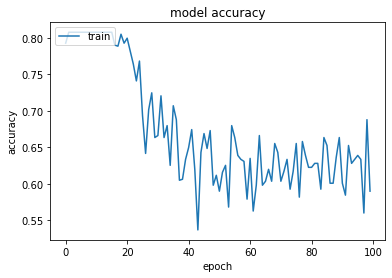

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history2.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

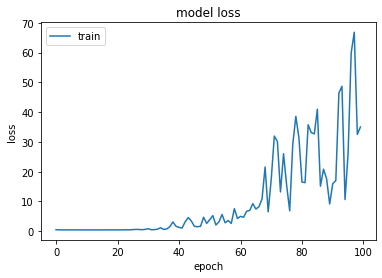

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot training loss
plt.plot(history2.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test2= model2.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 27.5829 - accuracy: 0.7989


In [ ]:
history_test2

[27.5828800201416, 0.7989130616188049]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
predictions = (model2.predict(X_test) > 0.5).astype("int32")
cm = multilabel_confusion_matrix(y_test, predictions)
ac = accuracy_score(y_test,predictions)
print(classification_report(y_test, predictions))
print(cm)
print(ac)

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       108
           1       0.00      0.00      0.00        37

   micro avg       0.59      0.74      0.66       145
   macro avg       0.29      0.50      0.37       145
weighted avg       0.44      0.74      0.55       145
 samples avg       0.59      0.59      0.59       145

[[[  0  76]
  [  0 108]]

 [[147   0]
  [ 37   0]]]
0.5869565217391305


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
